In [1]:
# 텐서플로우가 어떤 식으로 돌아가는지는 대충 알겠는데 
# 사실 왜 쓰는지에 대해서는 아직 의문이 있으실겁니다
# 이번에는 간단한 뉴럴넷을 학습시키는 과정을 텐서플로우 없이 한번 
# 텐서플로우를 사용해서 한번 짜보는 과정을 통해 어떤점이 편리하고 
# 왜 사용해야하는지 알아보도록 하겠습니다
# 이 코드를 보고 처음부터 완전히 이해하려고 안하셔도 되고 
# 우선 큰 흐름이 어떻게 흘러가는지 이해하시고 세세한 부분을 보시는게 더 좋다고 생각합니다

In [2]:
# 우선 numpy와 matplotlib를 불러옵니다
# matplotlib는 시각화툴이라고 보시면됩니다
# %matplotlib inline은 ipython에서 시각화된 결과를 볼 수 있게해주는 명령어입니다

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

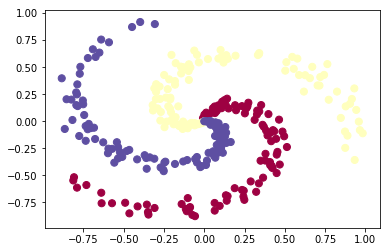

In [3]:
# 먼저 이번 예제에서 사용할 데이터를 생성하겠습니다
# 만들려고 하는 데이터는 3개의 클래스로 나누어지는 나선형의 데이터입니다
# 각 클래스별로 100개의 데이터가 있고 이것을 2차원의 공간에 생성합니다

N = 100 
D = 2 
K = 3 
X = np.zeros((N*K,D)) # (x,y) 좌표
y = np.zeros(N*K, dtype='uint8') # 클래스값값

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # 반지름 
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # 세타값
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)] # np.c_(a,b) -> a와 b를 (a,b)로 바꿔줌
  y[ix] = j

# matplotlib.pyplot.scatter(x,y,c=컬러기준,s=점의크기,cmap=컬러맵핑)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Spectral)

In [4]:
# 데이터가 생겼으니 이제 뉴럴넷으로 비선형 구분선을 만들어보겠습니다
# Input -> Hidden layer -> Output의 형태로 만든다고하면 
# 화살표(->) 하나당 weight & bias가 필요합니다
# Hidden Layer의 뉴런의 개수는 100개로 임의로 설정하겠습니다
# (300,2)*(2,100) + bias1 = (300,100)
# (300,100)*(100,3) + bias2 = (300,3)

H=100 # Hidden layer node 수
w1=0.01*np.random.rand(D,H)/np.sqrt(D/2)
b1=np.zeros([1,H])
w2=0.01*np.random.rand(H,3)/np.sqrt(H/2)
b2=np.zeros([1,K])

In [5]:
# hyperparameter 설정입니다 
# 원래는 맨 위에 적어놓는데 설명의 흐름에 맞춰 여기에 배정했습니다
# learning rate, regularization lambda, training iteration
# loss calculation, activation function이 남아있습니다
# loss는 softmax를 사용하여 계산하고, activation function은 ReLU를 사용하겠습니다
# 총 input의 개수를 num_examples로 저장해둡니다

learning_rate=1e-2
reg_lambda=1e-2
iteration=10000
num_examples=X.shape[0]

In [6]:
for i in range(10000):
    
    # forward propagation
    # np.dot은 행렬곱셈, np.maximum은 relu의 역할을합니다
    hidden_layer=np.maximum(0,np.dot(X,w1)+b1)
    output_layer= np.dot(hidden_layer,w2)+b2

    # softmax classifier
    # np.sum의 axis,keepdims은 연산에 맞게 행렬의 모양을 변형 및 유지시킵니다
    exp_scores=np.exp(output_layer)
    probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    
    # cross entropy loss 계산
    cross_entropy_loss= -np.sum(1.0*np.log(probs[range(num_examples),y]))
    data_loss=cross_entropy_loss/num_examples
    reg_loss=1/2*reg_lambda*(np.sum(w1*w1)+np.sum(w2*w2))
    
    loss=data_loss+reg_loss
    
    # error calculation
    # 모델연산결과값-실제결과값
    errors=probs
    errors[range(num_examples),y]-=1
    
    # backpropagation
    # output layer -> hidden layer
    dw2=np.dot(hidden_layer.T,errors)
    db2=np.sum(errors,axis=0,keepdims=True)

    #ReLU backprop
    dhidden_error=np.dot(errors,w2.T)
    dhidden_error[hidden_layer<=0]=0

    # hidden layer -> input layer
    dw1=np.dot(X.T,dhidden_error)
    db1=np.sum(dhidden_error,axis=0,keepdims=True)

    # regularization식의 1/2*w^2를 미분하면 그냥 w가 됩니다
    dw2+=reg_lambda*w2
    dw1+=reg_lambda*w1

    # model update
    # -인 이유는 error가 모델연산값-실제값이기 때문입니다
    w1+= -learning_rate*dw1
    b1+= -learning_rate*db1
    w2+= -learning_rate*dw2
    b2+= -learning_rate*db2

In [7]:
# 위와 같이 학습을 시키고 나서 학습이 잘 되었는지 확인하기 위해 현재의 weight와 bias를 가지고 
# prediction을 해서 정확도를 확인해봅니다

hidden_layer = np.maximum(0, np.dot(X, w1) + b1)
scores = np.dot(hidden_layer, w2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8769146238182262, 1.9030853761817772)

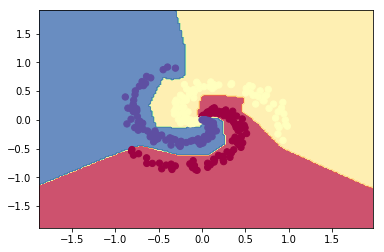

In [8]:
# 학습된 모델을 데이터와 함께 경계선을 그려보겠습니다

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())